In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimSun'

# 假设你的数据存储在一个名为 data.csv 的文件中，其中包含 'date'、'flight' 和 'sales' 三列
data = pd.read_csv('../table2.csv',encoding='gbk')

# 将 'date' 列转换为日期类型
data['航班日期'] = pd.to_datetime(data['航班日期'])

# 按照日期对销售额进行聚合
daily_sales = data.groupby('航班日期')['航线金额'].sum().reset_index()

daily_sales

,航班日期,航线金额
0,2023-01-01,168320.00
1,2023-01-02,222618.00
2,2023-01-03,304062.00
3,2023-01-04,377547.00
4,2023-01-05,297465.00
...,...,...
360,2023-12-27,668665.35
361,2023-12-28,732326.64
362,2023-12-29,1040086.00
363,2023-12-30,740359.38


In [2]:
daily_sales.to_csv('data.csv', index=False,encoding='gbk')

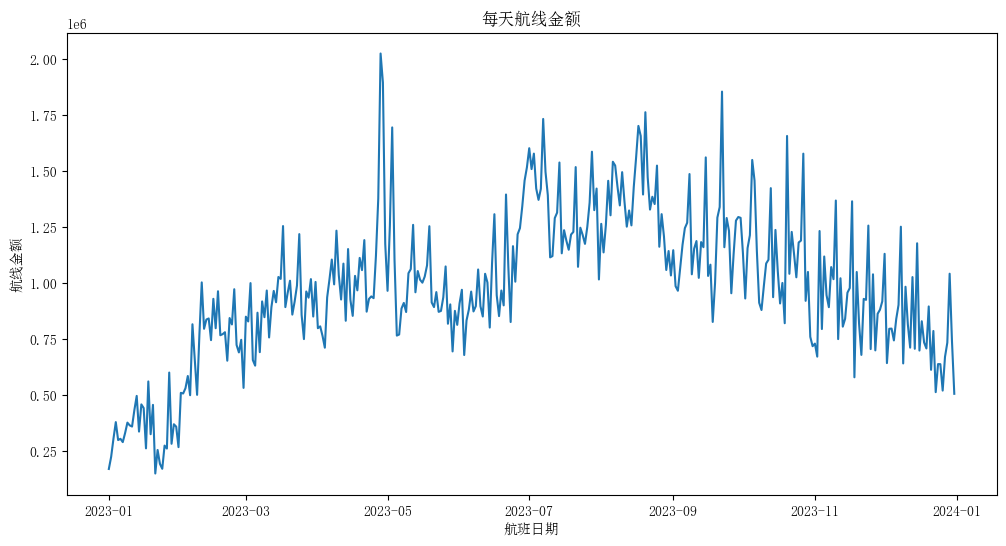

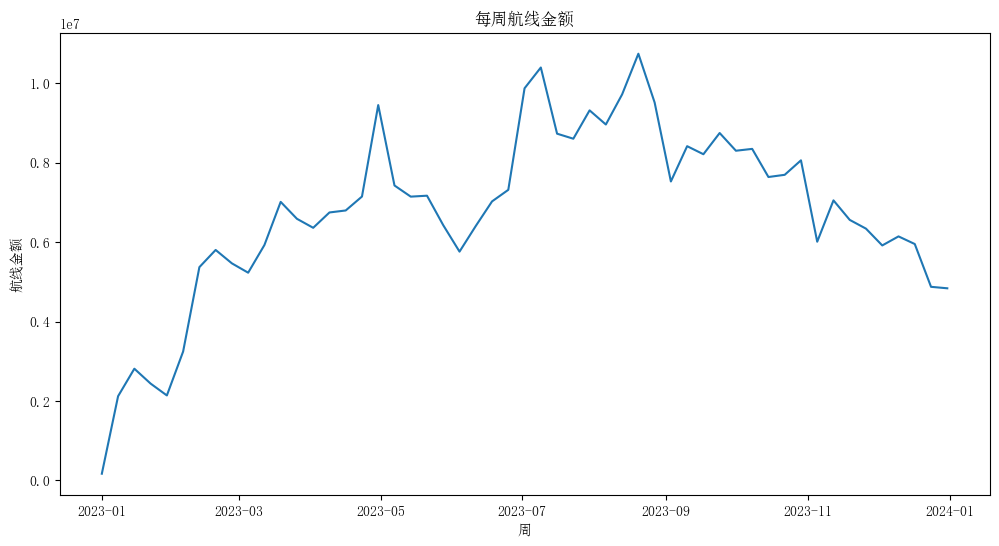

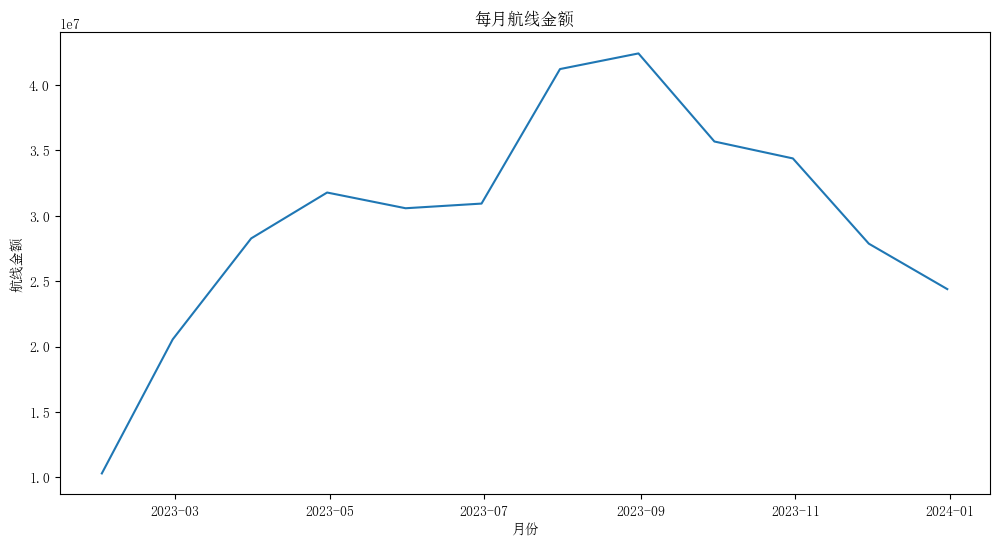

In [3]:
# 设置'航班日期'列为索引
daily_sales.set_index('航班日期', inplace=True)

# 绘制每天销售额折线图
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['航线金额'])
plt.title('每天航线金额')
plt.xlabel('航班日期')
plt.ylabel('航线金额')
plt.show()

# 按周聚合销售额
weekly_sales = daily_sales.resample('W').sum()

# 绘制每周销售额折线图
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales['航线金额'])
plt.title('每周航线金额')
plt.xlabel('周')
plt.ylabel('航线金额')
plt.show()

# 按月聚合销售额
monthly_sales = daily_sales.resample('ME').sum()

# 绘制每月销售额折线图
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['航线金额'])
plt.title('每月航线金额')
plt.xlabel('月份')
plt.ylabel('航线金额')
plt.show()